Compare performances of `onepbiter!` and `onebpiter_slow!`

In [105]:
include("../code/headers.jl")
using BenchmarkTools
seed = 1234

1234

In [118]:
sizes = [100, 500, 1000, 5000, 10000, 50000]
N = length(sizes)
times = zeros(N)
for i in 1:N
    n = sizes[i]; m = Int(3/5*n)
    times[i] = @belapsed LossyModel(Val(2), n, m, randseed=seed)
end

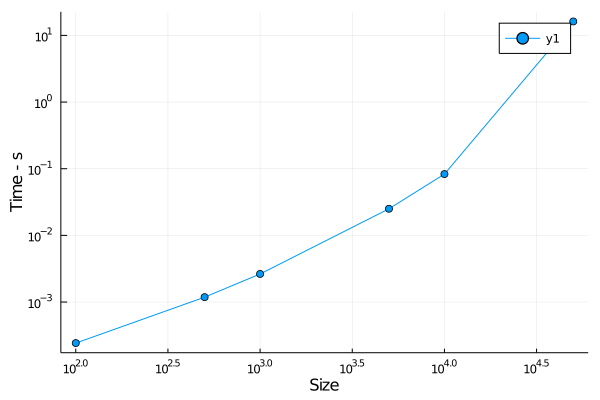

In [120]:
plot(sizes, times, scale=:log10, marker=:circle, ylabel="Time - s", xlabel="Size")

In [121]:
n = 10000
m = 6000
seed = 1234
algo = MS(maxiter = 100, Tmax=1, gamma=1e-3, sigma=1e-10, convergence=:messages, tol=-1.0)
lm1 = LossyModel(Val(2), n, m, randseed=seed)
lm2 = deepcopy(lm1)
independent = falses(n)
basis = lightbasis(lm1.fg, independent);

Slow version:

In [122]:
@btime solve!($lm1, $algo, randseed=$seed, oneiter! = $onebpiter_slow!, independent = $independent, basis= $basis);

  867.875 ms (10627094 allocations: 927.66 MiB)


Fast version:

In [123]:
@btime solve!($lm2, $algo, randseed=$seed, oneiter! = $onebpiter!, independent = $independent, basis= $basis);

  85.122 ms (626994 allocations: 30.44 MiB)
